In [1]:
import zutils.file as zfile

from pIMOS.xrwrap import solander_ctd
from pIMOS.xrwrap import rsi_vmp
import pIMOS.xrwrap.lisst as lisst

# import pIMOS.xrwrap.SEABIRD_37_39_56 as wrap_sbd

import os
import matplotlib.pyplot as plt
import datetime
import numpy as np 
import pandas as pd
import xarray as xr
import glob

from pIMOS.utils import othertime
import pIMOS.utils.quality_control as pqc
import importlib

# O Drive is //drive.irds.uwa.edu.au/CEME-BBL-001
# pIMOS_export_dir = r'O:\Data\pIMOS\KISSME'

project_root = r'G:\Experiments\kissme17'
project_root = r'E:\Experiments\kissme17'

archive_dir = os.path.join(project_root, 'Archive_Profiling_FV00') 
dbconfig_file = os.path.join('./', 'database', 'config.txt') 

if not os.path.exists(archive_dir):
    os.mkdir(archive_dir)
    
import pIMOS.utils.UWA_archive_utils as ai

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
db_config
db_data

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


autonomous_metadata = pIMOS_KISSME_Instruments.csv

profiler_metadata = pIMOS_KISSME2017_CTDVMP_Logbook.csv

possible_mooring_dates = pIMOS_possible_mooring_dates.csv
autonomous_metadata = pIMOS_KISSME_Instruments.csv

profiler_metadata = pIMOS_KISSME2017_CTDVMP_Logbook.csv

possible_mooring_dates = pIMOS_possible_mooring_dates.csv


{'autonomous_metadata':         Project            Site StationID        Type Trip Recovered  \
 0      IMOS NWS    Browse Shelf    BRB200      Moored            NaN   
 1      IMOS NWS    Browse Shelf    BRB200      Moored            NaN   
 2      IMOS NWS    Browse Shelf    BRB200      Moored            NaN   
 3      IMOS NWS    Browse Shelf    BRB200      Moored            NaN   
 4      IMOS NWS    Browse Shelf    BRB200      Moored            NaN   
 ..          ...             ...       ...         ...            ...   
 127  KISSME2017  Browse Prelude     WP250      Moored     KISSME_REC   
 128  KISSME2017  Browse Prelude     WP250      Moored     KISSME_REC   
 129  KISSME2017  Browse Prelude     WP250      Moored     KISSME_REC   
 130  KISSME2017  Browse Prelude     WP250      Moored     KISSME_REC   
 131  KISSME2017  Browse Prelude       NaN  ProfileAux     KISSME_DEP   
 
      Longitude  Latitude  Depth TimeZone  InstrumentDepth  \
 0     123.0459  -14.2426 -200.0     

# VMP Now
Start with a test

In [2]:
if False:

    pfile = project_root + r'\Archive_Profiling_FV00\VMP_test\UWA_013.P'
    ini_file = project_root + r'\Archive_Profiling_FV00\VMP_test\default_vehicle_attributes.ini'

    rr, ds = rsi_vmp.from_pfile(pfile, ini_file)

    rr.add_comment('AZ', 'Testing')

    rr.ds.Ax.plot()

## Now crush through them
VMP logs are a nightmare. Do these blind for now. 

In [9]:
pfilewc = project_root + r'/Data/Rockland/VMP/UWA*.P'
pfiles = glob.glob(pfilewc)
print(pfiles)

ini_file = project_root + r'/ProfileData/VMP/default_vehicle_attributes.ini'
# ini_file = project_root + r'\Archive_Profiling_FV00\VMP_test\default_vehicle_attributes.ini'

direc = r'E:/Experiments/kissme17/ProfileData/VMP/'

# for pfile in pfiles:
for index, row in db_data['profiler_metadata'].iterrows():
        
    attributes = ai.profiler_row_to_attrs(row)
    instrument = attributes['instrument_model']
    filename = attributes['raw_file_name']
    
    if not type(instrument) == str:
        print('Skipping')
        continue
    if not instrument.lower() in ['rockland_vmp_250']:
        print('Skipping')
        continue
        
#     attributes = {
#         'project': row['Project'],
#         'raw_file_name': row['Filename'],
#         'site_station': row['StationID'],
#         'trip': row['Trip'],
#         'is_profile_data': 1,
#         'timezone': 'UTC',
#         'instrument_model':  row['InstrumentType'],
#         'nominal_latitude': row['Profiler in [Lat]'],
#         'nominal_longitude': row['Profiler in [Lon]']}
    
    if not filename[-2::] == '.p':
#         filename = os.path.join(filename, '.p')
        filename += '.p'
    
    filename = os.path.join(direc, filename)
        
    rr, ds = rsi_vmp.from_pfile(filename, ini_file)
    rr.update_attributes_with_dict(attributes)
    
    ai.pIMOS_export(rr, archive_dir, instrument)
    

[]
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
Skipping
***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int(

***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'
invalid literal for int() with base 10: ''
Header digested, reading records
Reading complete, calculating time and calibrating
Not doing the second fit as yet
Fast and slow are equal in length, no interp needed
Not doing the second fit as yet
Not doing the second fit as yet
{'id': '5', 'type': 'therm', 'name': 'T1_dT1', 'diff_gain': '0.95', 'data': array([10834., 10891., 10968., ..., 10864., 10831., 10848.]), 'time': array(['2017-04-03T00:26:48.000000', '2017-04-03T00:26:48.000000',
       '2017-04-03T00:26:48.000000', ..., '2017-04-03T00:40:40.000000',
       '2017-04-03T00:40:40.000000', '2017-04-03T00:40:40.000000'],
      dtype='datetime64[us]')}
adc_fs
Failed in calibrating T1_dT1
{'id': '7', 'type': 'therm', 'name': 'T2_dT2', 'diff_gain': '0.92', 'data': array([-46.,

***ASSUMING VMP, FIX THIS IN THE FUTURE***
***ODAS ATTEMT TO TAKE THIS FROM ROOT AND FAILING THAT ASSUME VMP***
***HAVE DONE NOTHING WITH THE HOTEL FILE, FIX THIS IN THE FUTURE***
***HAVE DONE NOTHING WITH THE TEMPERATURE, FIX THIS IN THE FUTURE***
***IVE DONE A HACK JOB OF THE GRADIENTS, FIX THIS IN THE FUTURE***
Not sure what this is: T1!
Not sure what this is: T2!
Initialising accessor.
STORING RAW FILE ATTRIBUTES
YEAR
MONTH
DAY
HOUR
MINUTE
SECOND
MILLISECOND
DATETIME
CONFIG_STRING
FS_FAST
FS_SLOW
E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250//[KISSME2017]_[KISSME2017Deployment]_[SP250_12hr]_[rockland_vmp_250]_[no_instrument_serial_number]_[UWA_011]_[no_outfile_append].nc
***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did n

file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'
invalid literal for int() with base 10: ''
Header digested, reading records
Reading complete, calculating time and calibrating
Not doing the second fit as yet
Fast and slow are equal in length, no interp needed
Not doing the second fit as yet
Not doing the second fit as yet
{'id': '5', 'type': 'therm', 'name': 'T1_dT1', 'diff_gain': '0.95', 'data': array([-18., -17., -14., ..., -14., -13., -13.]), 'time': array(['2017-04-04T23:32:38.000000', '2017-04-04T23:32:38.000000',
       '2017-04-04T23:32:38.000000', ..., '2017-04-04T23:54:51.000000',
       '2017-04-04T23:54:51.000000', '2017-04-04T23:54:51.000000'],
      dtype='datetime64[us]')}
adc_fs
Failed in calibrating T1_dT1
{'id': '7', 'type': 'therm', 'name': 'T2_dT2', 'diff_gain': '0.92', 'data': array([-58., -52., -48., ..., -55., -55., -55.]), 'time': array(['2017-04-04T23:32:38.000000', '2017-04-04T23:32:38.

***HAVE DONE NOTHING WITH THE HOTEL FILE, FIX THIS IN THE FUTURE***
***HAVE DONE NOTHING WITH THE TEMPERATURE, FIX THIS IN THE FUTURE***
***IVE DONE A HACK JOB OF THE GRADIENTS, FIX THIS IN THE FUTURE***
Not sure what this is: T1!
Not sure what this is: T2!
Initialising accessor.
STORING RAW FILE ATTRIBUTES
YEAR
MONTH
DAY
HOUR
MINUTE
SECOND
MILLISECOND
DATETIME
CONFIG_STRING
FS_FAST
FS_SLOW
E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250//[KISSME2017]_[KISSME2017Deployment]_[UWAB_transect]_[rockland_vmp_250]_[no_instrument_serial_number]_[UWA_018]_[no_outfile_append].nc
***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'

***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'
invalid literal for int() with base 10: ''
Header digested, reading records
Reading complete, calculating time and calibrating
Not doing the second fit as yet
Fast and slow are equal in length, no interp needed
Not doing the second fit as yet
Not doing the second fit as yet
{'id': '5', 'type': 'therm', 'name': 'T1_dT1', 'diff_gain': '0.95', 'data': array([ 9845.,  9833.,  9833., ..., 10204., 10183., 10117.]), 'time': array(['2017-04-05T22:02:22.000000', '2017-04-05T22:02:22.000000',
       '2017-04-05T22:02:22.000000', ..., '2017-04-05T22:18:18.000000',
       '2017-04-05T22:18:18.000000', '2017-04-05T22:18:18.000000'],
      dtype='datetime64[us]')}
adc_fs
Failed in calibrating T1_dT1
{'id': '7', 'type': 'therm', 'name': 'T2_dT2', 'diff_gain': '0.92', 'data': array([5348.

Not sure what this is: T1!
Not sure what this is: T2!
Initialising accessor.
STORING RAW FILE ATTRIBUTES
YEAR
MONTH
DAY
HOUR
MINUTE
SECOND
MILLISECOND
DATETIME
CONFIG_STRING
FS_FAST
FS_SLOW
E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250//[KISSME2017]_[KISSME2017Deployment]_[SP250_12hr_neap]_[rockland_vmp_250]_[no_instrument_serial_number]_[UWA_025]_[no_outfile_append].nc
***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'
invalid literal for int() with base 10: ''
Header digested, reading records
Reading complete, calculating time and calibrating
Not doing the second fit as yet
Fast and slow are equal in length, no inte

***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'
invalid literal for int() with base 10: ''
Header digested, reading records
Reading complete, calculating time and calibrating
Not doing the second fit as yet
Fast and slow are equal in length, no interp needed
Not doing the second fit as yet
Not doing the second fit as yet
{'id': '5', 'type': 'therm', 'name': 'T1_dT1', 'diff_gain': '0.95', 'data': array([13706., 13684., 13617., ..., 15108., 15376., 15620.]), 'time': array(['2017-04-06T06:29:45.000000', '2017-04-06T06:29:45.000000',
       '2017-04-06T06:29:45.000000', ..., '2017-04-06T06:39:20.000000',
       '2017-04-06T06:39:20.000000', '2017-04-06T06:39:20.000000'],
      dtype='datetime64[us]')}
adc_fs
Failed in calibrating T1_dT1
{'id': '7', 'type': 'therm', 'name': 'T2_dT2', 'diff_gain': '0.92', 'data': array([8166.

{'id': '7', 'type': 'therm', 'name': 'T2_dT2', 'diff_gain': '0.92', 'data': array([6238., 6155., 6162., ..., 6427., 6431., 6435.]), 'time': array(['2017-04-06T07:58:22.000000', '2017-04-06T07:58:22.000000',
       '2017-04-06T07:58:22.000000', ..., '2017-04-06T08:21:15.000000',
       '2017-04-06T08:21:15.000000', '2017-04-06T08:21:15.000000'],
      dtype='datetime64[us]')}
adc_fs
Failed in calibrating T2_dT2
T1_hres is a hres column, popping it (Spirit of JSC)
Fast and slow are equal in length, no interp needed
P_hres is a hres column, popping it (Spirit of JSC)
Fast and slow are equal in length, no interp needed
T2_hres is a hres column, popping it (Spirit of JSC)
Fast and slow are equal in length, no interp needed
***ASSUMING VMP, FIX THIS IN THE FUTURE***
***ODAS ATTEMT TO TAKE THIS FROM ROOT AND FAILING THAT ASSUME VMP***
***HAVE DONE NOTHING WITH THE HOTEL FILE, FIX THIS IN THE FUTURE***
***HAVE DONE NOTHING WITH THE TEMPERATURE, FIX THIS IN THE FUTURE***
***IVE DONE A HACK JOB 

E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250//[KISSME2017]_[KISSME2017Deployment]_[SP250_12hr_neap]_[rockland_vmp_250]_[no_instrument_serial_number]_[UWA_035]_[no_outfile_append].nc
***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'
invalid literal for int() with base 10: ''
Header digested, reading records
Reading complete, calculating time and calibrating
Not doing the second fit as yet
Fast and slow are equal in length, no interp needed
Not doing the second fit as yet
Not doing the second fit as yet
{'id': '5', 'type': 'therm', 'name': 'T1_dT1', 'diff_gain': '0.95', 'data': array([13261., 13187., 13155., ..., 1037

***THE CONCEPT OF ODD AND EVEN CHANNELS HAS NOT BEEN IMPLEMENTED, FIX THIS IN THE FUTURE***
file open
Did not find the section
invalid literal for int() with base 10: 'tr'
invalid literal for int() with base 10: '_r'
invalid literal for int() with base 10: ''
Header digested, reading records
Reading complete, calculating time and calibrating
Not doing the second fit as yet
Fast and slow are equal in length, no interp needed
Not doing the second fit as yet
Not doing the second fit as yet
{'id': '5', 'type': 'therm', 'name': 'T1_dT1', 'diff_gain': '0.95', 'data': array([13470., 13381., 13271., ..., 10220.,  9470.,  9342.]), 'time': array(['2017-04-07T06:23:04.000000', '2017-04-07T06:23:04.000000',
       '2017-04-07T06:23:04.000000', ..., '2017-04-07T06:45:40.000000',
       '2017-04-07T06:45:40.000000', '2017-04-07T06:45:40.000000'],
      dtype='datetime64[us]')}
adc_fs
Failed in calibrating T1_dT1
{'id': '7', 'type': 'therm', 'name': 'T2_dT2', 'diff_gain': '0.92', 'data': array([8384.

In [8]:
ai.pIMOS_export(rr, archive_dir, instrument)

E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\Archive_Profiling_FV00\rockland_vmp_250//[KISSME2017]_[KISSME2017Deployment]_[SP250_12hr]_[rockland_vmp_250]_[no_instrument_serial_number]_[UWA_005]_[no_outfile_append].nc


# Make a MAP


In [15]:
import shapefile
import cartopy.crs as ccrs
import zutils.plotting as zplot

shp = shapefile.Reader(r'../../../zutils/data/bathy/ga/NWS_500.shp')
shp = shapefile.Reader(r'../../../zutils/sandpit/BATHY_ga_grid_to_coutour_shp/NWS_ALL_LEVELS.shp')


Figure size is 27.909090909090807 x 13.0 cm


Text(0.5, 1.0, 'B-Transect')

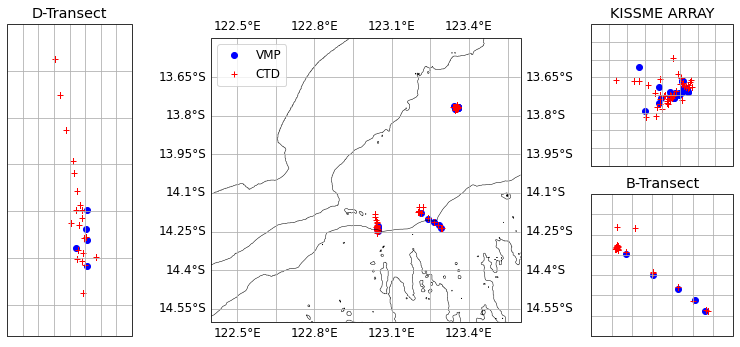

In [16]:

xl = [123, 123.4]
yl = [-14.4, -13.7]

xl = [122.4, 123.6]
yl = [-14.6, -13.5]

vmp_path = os.path.join(archive_dir, 'rockland_vmp_250')

plt.figure(figsize=(10, 10))

zl = zplot.axis_layer(heights = [5, 5], widths = [5, 10*np.diff(xl)/np.diff(yl), 5], hspace=2.5) 
zl.verbose = False

ax1 = zl.lay(1, 0, rowbleed=1, projection=ccrs.PlateCarree())
ax_main = zl.lay(1, 1, rowbleed=1, projection=ccrs.PlateCarree())

ax2 = zl.lay(0, 2, projection=ccrs.PlateCarree())
ax3 = zl.lay(1, 2, projection=ccrs.PlateCarree())

# plt.axes()
# ax_main = plt.axes(projection=ccrs.PlateCarree())

for i, file in enumerate(os.listdir(vmp_path)):
    
    fullpath = os.path.join(vmp_path, file)
    
    ds = xr.open_dataset(fullpath)
    
    if i == 0:
        label = 'VMP'
    else:
        label = None
        
    ax_main.plot(ds.lon_nom, ds.lat_nom, 'bo', label=label)
    ax1.plot(ds.lon_nom, ds.lat_nom, 'bo')
    ax2.plot(ds.lon_nom, ds.lat_nom, 'bo')
    ax3.plot(ds.lon_nom, ds.lat_nom, 'bo')
    
ctd_path = os.path.join(archive_dir, 'solander ctd')

for i, file in enumerate(os.listdir(ctd_path)):
    
    fullpath = os.path.join(ctd_path, file)
    
    ds = xr.open_dataset(fullpath)
    
    if i == 0:
        label = 'CTD'
    else:
        label = None
    ax_main.plot(np.mean(ds.longitude), np.mean(ds.latitude), 'r+', label=label)
    ax1.plot(np.mean(ds.longitude), np.mean(ds.latitude), 'r+')
    ax2.plot(np.mean(ds.longitude), np.mean(ds.latitude), 'r+')
    ax3.plot(np.mean(ds.longitude), np.mean(ds.latitude), 'r+')
    
for record in shp.shapeRecords():
    x, y = np.array(record.shape.points).T
    ax_main.plot(x, y, 'k', lw=0.5)

ax_main.legend()
ax_main.set_xlim(xl)
ax_main.set_ylim(yl)
ax_main.set_aspect('equal')
ax_main.gridlines(draw_labels=True)

ax1.set_xlim(123.02, 123.06)
ax1.set_ylim(-14.27, -14.17)
ax1.gridlines()
ax1.set_title('D-Transect')

ax2.set_xlim(123.33, 123.37)
ax2.set_ylim(-13.79, -13.75)
ax2.gridlines()
ax2.set_title('KISSME ARRAY')

ax3.set_ylim(-14.26, -14.12)
ax3.set_xlim(123.18, 123.32)
ax3.gridlines()
ax3.set_title('B-Transect')


# Check naming

In [7]:
print(rr.get_export_location(naming_method='convention'))
print()
print(rr.get_export_location(naming_method='raw_file'))
print()
print(rr.get_export_location(naming_method='last_load'))
print()
print(rr.get_export_location(naming_method=None))

Generating filename from naming convention.
Best export dir is the raw_file_directory.
('G:\\Experiments\\kissme17\\Archive_Profiling_FV00\\VMP', '__.nc')

Will save file using raw file name and directory.
('G:\\Experiments\\kissme17\\Archive_Profiling_FV00\\VMP', 'UWA_013.nc')

Will save file using last load file name and directory.
('', '')

Will save file using raw file name and directory.
('G:\\Experiments\\kissme17\\Archive_Profiling_FV00\\VMP', 'UWA_013.nc')


In [11]:
rr.export(naming_method='raw_file')

Will save file using raw file name and directory.
Exporting G:\Experiments\kissme17\Archive_Profiling_FV00\VMP//UWA_013.nc


<xarray.Dataset>
Dimensions:     (time_fast: 1192448, time_slow: 149056)
Coordinates:
  * time_fast   (time_fast) datetime64[ns] 2017-04-03T07:58:14 ... 2017-04-03...
  * time_slow   (time_slow) datetime64[ns] 2017-04-03T07:58:14 ... 2017-04-03...
Data variables: (12/28)
    Ax          (time_fast) float64 -1.57e+03 -3.316e+03 ... -2.139e+03 -686.7
    Ay          (time_fast) float64 -1.315e+03 -4.846e+03 ... -2.403e+03
    sh1         (time_fast) float64 6.443 -12.01 -18.35 ... 33.86 71.1 67.16
    sh2         (time_fast) float64 3.872 -3.986 -10.93 ... -48.4 -28.24 11.62
    T1_dT1      (time_fast) float64 1.269e+04 1.27e+04 ... 9.315e+03 9.105e+03
    V_Bat       (time_slow) float64 15.85 15.85 15.85 ... 15.73 15.72 15.72
    ...          ...
    W_fast      (time_fast) float64 0.007514 0.007487 ... -0.00165 -0.001649
    W_slow      (time_slow) float64 0.01236 0.01193 ... -0.0008984 -0.0008535
    speed_fast  (time_fast) float64 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05 0.05
    speed_slow  (time_slow) float64 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05 0.05
    gradT1      (time_fast) float64 -7.148 -7.148 -6.21 ... -0.03166 -9.851
    gradT2      (time_fast) float64 0.008249 0.008249 ... -0.06126 -0.1119
Attributes: (12/32)
    title:                           Measured data from a RSI VMP read from ....
    institution:                     The University of Western Australia
    institution_division:            Ocean Dynamics
    source:                          RSI VMP
    project:                         
    history:                         
    ...                              ...
    nominal_site_depth:              
    pressure_sensor_height_asb:      
    nominal_instrument_height_asb:   
    nominal_instrument_orientation:  
    timezone:                        
    is_profile_data:                 0

## LISST

I DIDN'T HAVE THE LISST_OutputInfo.csv or LISST_Sediment_SizeBins.csv FILES FOR THE PROFILING GUY. I COPIED FROM THE MOORED GUY. ASK WILL!!!!!


In [73]:
filename = r'E:\Experiments\kissme17\ProfileData\LISST\2009\L0900428.csv'

rr, ds = lisst.from_csv(filename)

rr.update_attributes_with_dict(attributes)

pqc.pimosInOutWaterQC(rr, mooring, db_data)

ai.pIMOS_export(rr, archive_dir, instrument)

# fig = ai.plot_temp(rr, db_data, mooring.lower(), attributes, variable='depth',plotraw=True, experiment='kissme', recovered='kissme_recovery')
# png_path = rr.fullpath_last_export[0:-3] +'.png'
# fig.savefig(png_path, dpi=300)

Im a string
Reading info
Reading csv
Converting time
Adding flags
Parsing csv
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "L0900428.csv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\ProfileData\LISST\2009"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'L0900428.csv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\ProfileData\\LISST\\2009', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_latitude': '', 'nominal_longitude': '', 'nominal_site_depth': '', 'pressur

NameError: name 'attributes' is not defined

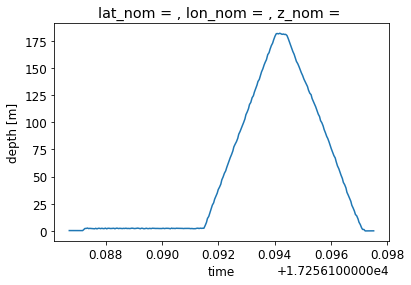

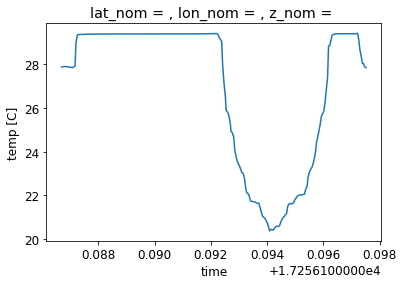

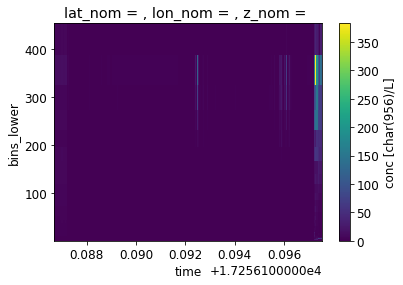

In [81]:
rr.ds.depth.plot()
plt.show()
rr.ds.temp.plot()
plt.show()
rr.ds.conc.T.plot()


# ^^ NOT THE SAME AS WILL'S NETCDFS. ASK. 